**[2025-2] CSC4023 Deep Learning (딥러닝입문)**

Exercise 02: Loss Function & Backpropagation



# 1. Loss Function (MLE)
---


주어진 실수 표본 $x_1, \ldots, x_n$ 에 대해 데이터들이 정규분포 $N(\mu, \sigma^2)$ 에서 생성되었다고 가정하고,
- MLE(최대우도추정) 로 $\mu$, $\sigma^2$ 를 추정한다.
- 참고: 이 경우, likelihood는 $\sum_{i=1}^n \log Pr(x_i |\mu, \sigma^2)$ 이며, 정규분포 Pr 을 가정할 수 있음.
- 경사하강(GD) 으로 NLL을 최소화하여 MLE에 수렴함을 확인한다.
- 추정한 $\mu$, $\sigma^2$ 을 사용해 해당 정규분포 PDF를 시각화하고, 이를 실수 표본 $x_1, \ldots, x_n$ 의 히스토그램 위에 겹쳐서 시각화함으로써 추정한 평균과 분산이 얼마나 데이터를 잘 표현하는 지 확인한다.

In [2]:
%pip install -q --upgrade pip setuptools wheel
%pip install -q numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


���� �̸�, ���͸� �̸� �Ǵ� ���� ���̺� ������ �߸��Ǿ����ϴ�.


Note: you may need to restart the kernel to use updated packages.


���� �̸�, ���͸� �̸� �Ǵ� ���� ���̺� ������ �߸��Ǿ����ϴ�.


#### 1-1. 데이터 셋 생성

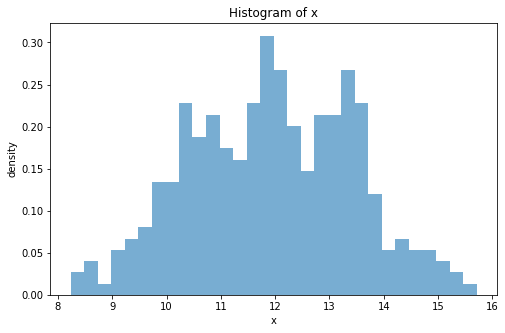

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([11.8539183 , 13.16100743,  9.72492776, 10.95103768, 11.84073491,
        15.39468384, 14.20364597, 11.67211745, 13.20733751, 12.32421829,
        10.35324996, 10.69069674, 10.33380272, 11.85966023, 12.25012566,
         9.17083185, 13.68151233, 12.05869188, 11.74107598, 11.48105827,
        14.51239245, 11.70150784, 11.71267075, 13.1350999 , 11.99888174,
        13.23671456, 12.13754504, 12.10475925, 13.89825985, 11.90249858,
        10.57554199, 10.00895402, 12.08954442, 10.47227423, 13.18357024,
        12.4398513 , 11.50865138, 10.96608543, 11.88465911, 12.93593542,
        13.35599094, 10.11183815, 15.00659989, 10.97987445, 10.13078292,
        14.45425172, 13.92317321, 13.48047907, 10.93186086, 13.69074384,
        11.82648263,  9.79710089, 10.93826453, 10.00448438, 13.42640686,
        13.85564662, 10.35673642, 11.75266592, 12.62391152, 10.15595819,
        13.48162648, 10.41156209,  9.80100096, 10.66192961, 11.41168563,
        10.64099926, 13.90685138, 12.0029869 ,  9.74256337, 12.5427898 ,
         9.73222011, 14.42036383, 10.09938987, 11.2955853 , 12.3028311 ,
        10.7692682 , 10.44204464, 12.39963247,  9.53165452, 13.64478525,
         9.95624886, 10.01506549, 11.77103192,  8.50304396, 11.9717154 ,
        10.84634669, 12.52684415, 11.82850603, 13.4216891 , 10.57699216,
        13.25846469, 11.99630025, 11.18069291, 12.33812976, 10.77267822,
        11.06356388, 11.1470263 , 12.2811226 , 11.81456617,  8.62912253,
        14.26962562, 14.73048385, 10.98639434, 13.31887664, 12.87887428,
        11.32359134, 11.67438117, 13.69043345,  9.4559391 , 13.29028575,
        13.97140659, 10.98797888, 14.32687113, 13.25440067, 13.7327263 ,
        11.85085924, 10.36305501, 11.40478912,  8.42608852, 10.68697898,
        13.04954335, 10.6514051 , 12.59986662, 15.20233857, 11.14864519,
        12.52361882,  9.55896582, 13.4839603 , 13.47696654, 10.96360539,
        10.47461286, 11.30396289, 10.02214808, 12.85979509, 13.66169231,
        12.1865183 ,  9.13995812, 14.52043893, 12.75777537, 12.36595258,
         9.45178075, 11.82090071, 12.06864657, 12.16538897, 12.91321611,
        10.66616589, 11.23253933, 10.79842399, 11.63646829,  9.11405386,
        13.51228932, 12.7438341 , 13.19440727, 11.74326818, 12.44809078,
        11.20986072, 14.48373147, 10.01720402,  9.83493196, 11.78628654,
        12.25999927, 15.70983106, 13.65514877, 12.85140239, 10.60568241,
        10.45090086, 10.43553214, 13.22433094, 13.47099152, 13.38613391,
        10.49766123,  9.72764597, 12.12276736, 12.73462757, 12.32087064,
        13.21713886, 13.29580831, 13.9777477 , 13.23571865,  9.43784507,
        10.91668418, 11.63913813, 14.90800462, 10.89329072, 11.50089754,
        11.63825407, 13.1102049 , 11.49151108, 12.43813716,  9.80143533,
        12.14357264, 13.85155818, 12.89633806, 11.63375705, 13.35780282,
        13.33192922, 12.64130723, 13.08406024, 13.65945762, 10.84584505,
        11.03551191, 13.02581769, 14.70330063, 11.82252934, 10.36232147,
        13.93429587, 11.49135232, 11.35768524,  8.23564205, 11.78430998,
        12.94204378, 10.39879797, 13.39119547, 10.3379784 , 10.98709132,
        10.42876315, 10.51769711,  9.57456937, 11.37805012, 11.26552692,
        11.43139131, 12.21360448,  9.25226076, 12.66526671, 12.81849736,
        11.64523057, 12.80999995, 11.78374358, 14.76770829, 13.60671489,
        13.20060133,  9.76323355, 11.93527683, 13.03411845, 13.43601463,
        11.8511501 , 15.11558441, 12.68584582, 10.99425578, 10.93774739,
        12.82243057, 13.27356131, 12.89186871, 11.72655207, 13.73502818,
         9.68606887, 11.06605155, 12.25717935, 13.35143627, 12.73971986,
        10.34116205, 13.75668508, 14.41469254, 14.82355689, 12.5503725 ,
        15.40964138, 13.03183565, 12.59234629, 12.11908222, 10.88936971,
        11.55635402, 12.1262428 , 11.41579213, 12.03215929,  8.5390168 ,
        13.59463858,  9.28639686, 12.3083789 , 12.19148484, 11.82939404,
        11.02836901, 13.36370286, 12.88550626, 13.25200836, 10.950799  ,
        13.70326695, 10.33995892, 12.42550805, 10.18451981, 13.17245395,
        10.50498609, 13.69158631,  9.2199072 ,  9.92437378, 11.61708267,
        12.16168185, 14.14453641, 12.20876537, 12.97313522, 10.3430523 ,
        11.42410044, 10.56619613, 11.64459235, 12.09955972, 10.85256591,
        12.70009162, 13.0207109 ,  8.86129905,  9.90850605, 10.64189403])

plt.figure(figsize=(8,5))
plt.hist(x, bins=30, density=True, alpha=0.6)
plt.title("Histogram of x")
plt.xlabel("x")
plt.ylabel("density")
plt.show()

#### 1-2. Gradient Descent와 Cloased Form으로 평균과 분산 구하기
##### Part1.  for문에서는 gradient descent로 MLE 평균과 분산을 구한다.
 - MLE 추정 시 GD 학습의 안정성을 위해 분산 $\sigma^2$ 대신 s = $\log \sigma^2$ 에 대해 MLE를 추정하는 것을 권장함. (반드시 따르지 않아도 됨)
 - 평균(mu)과 표준편차(s)의 초기값은 관찰된 데이터의 empirical 평균과 분산 값을 기반으로 설정하였음.
 - GD를 위한 학습률은 lr_mu, lr_s로 고정되어 있음.
 - mu, s에 대한 기울기는 직접 식을 작성해야 함.
 - 해당 기울기를 사용해 GD를 수행함.
 - 매 epoch마다 평균과 분산, NLL 값을 출력함.

##### Part2. MLE를 계산하여, 해당 값을 mu_mle와 sigma2_mle에 작성한다.
- numpy 등 라이브러리를 사용하지 않고 계산 (내장 함수 사용 가능)

In [5]:
import numpy as np, math
# ---- 데이터 ----
x = np.asarray(x, float)
n  = x.size
xbar = np.mean(x)
var0 = np.var(x, ddof=0)
std0 = math.sqrt(var0)

# ---- 초기값 ----
mu = xbar + 2.0*std0      
s  = math.log(var0 * 0.2) 


# ---- 고정 학습률 (lr) ----
lr_mu = 1e-4      # μ 방향
lr_s  = 1e-3      # s(=log σ²) 방향

epochs = 400

print("epoch, mu, sigma2, NLL")
for epoch in range(1, epochs+1):
    # Part 1
    
    # 현재 sigma^2 값 계산
    sigma2 = math.exp(s)
    
    # NLL 계산
    nll = (n / 2) * math.log(2 * math.pi) + (n / 2) * s + (1 / (2 * sigma2)) * np.sum((x - mu)**2)
    
    # 그래디언트 계산
    grad_mu = (-1 / sigma2) * np.sum(x - mu)
    grad_s = (n / 2) - (1 / (2 * sigma2)) * np.sum((x - mu)**2)
    
    # 파라미터 업데이트
    mu = mu - lr_mu * grad_mu
    s = s - lr_s * grad_s
    
    print(f"{epoch:03d}, {mu:.6f}, {math.exp(s):.6f}, {nll:.6f}")

# ---- MLE Closed-form (Part 2) ----
# NumPy를 사용하지 않고 파이썬 내장 함수로 계산
mu_mle     = sum(x) / n
sigma2_mle = sum([(xi - mu_mle) ** 2 for xi in x]) / n

print("\n[GD 최종]     mu =", mu,           " sigma^2 =", math.exp(s))
print("[Closed-form] mu =", mu_mle,       " sigma^2 =", sigma2_mle)

epoch, mu, sigma2, NLL
001, 14.756903, 16.670710, 3907.729551
002, 14.751829, 15.731663, 789.751692
003, 14.746462, 14.923213, 786.275390
004, 14.740815, 14.226766, 783.326409
005, 14.734904, 13.626296, 780.826699
006, 14.728745, 13.108005, 778.703389
007, 14.722356, 12.660014, 776.890436
008, 14.715757, 12.272110, 775.329560
009, 14.708965, 11.935520, 773.970556
010, 14.701998, 11.642714, 772.771104
011, 14.694875, 11.387236, 771.696213
012, 14.687610, 11.163562, 770.717450
013, 14.680219, 10.966962, 769.812065
014, 14.672716, 10.793399, 768.962100
015, 14.665114, 10.639426, 768.153548
016, 14.657422, 10.502104, 767.375600
017, 14.649652, 10.378929, 766.619987
018, 14.641813, 10.267770, 765.880438
019, 14.633911, 10.166816, 765.152228
020, 14.625954, 10.074525, 764.431817
021, 14.617948, 9.989589, 763.716568
022, 14.609898, 9.910898, 763.004523
023, 14.601808, 9.837507, 762.294236
024, 14.593683, 9.768619, 761.584642
025, 14.585526, 9.703554, 760.874955
026, 14.577338, 9.641738, 760.1

#### 1-3. 시각화
- 1-2에서 구한 mu, sigma
- 추정한 $\mu$, $\sigma^2$ 을 사용해 해당 정규분포 PDF를 시각화하고, 이를 실수 표본 $x_1, \ldots, x_n$ 의 히스토그램 위에 겹쳐서 시각화함으로써 추정한 평균과 분산이 얼마나 데이터를 잘 표현하는 지 확인한다.

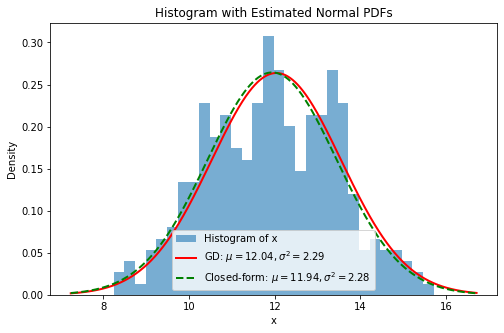

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

# GD로 찾은 파라미터
mu_gd = mu
sigma2_gd = math.exp(s)
sigma_gd = math.sqrt(sigma2_gd)

# Closed-form으로 찾은 파라미터
sigma_mle = math.sqrt(sigma2_mle)

# 시각화를 위한 x축 범위 설정
x_plot = np.linspace(x.min() - 1, x.max() + 1, 1000)

# GD 결과의 PDF 계산
pdf_gd = (1 / (sigma_gd * np.sqrt(2 * np.pi))) * \
         np.exp(- (x_plot - mu_gd)**2 / (2 * sigma2_gd))

# Closed-form 결과의 PDF 계산
pdf_mle = (1 / (sigma_mle * np.sqrt(2 * np.pi))) * \
          np.exp(- (x_plot - mu_mle)**2 / (2 * sigma2_mle))

# 시각화
plt.figure(figsize=(8,5))
# 데이터 히스토그램 (density=True로 정규화)
plt.hist(x, bins=30, density=True, alpha=0.6, label="Histogram of x")

# GD로 추정한 PDF
plt.plot(x_plot, pdf_gd, 'r-', linewidth=2, label=f'GD: $\\mu={mu_gd:.2f}, \\sigma^2={sigma2_gd:.2f}$')
# Closed-form으로 추정한 PDF
plt.plot(x_plot, pdf_mle, 'g--', linewidth=2, label=f'Closed-form: $\\mu={mu_mle:.2f}, \\sigma^2={sigma2_mle:.2f}$')

plt.title("Histogram with Estimated Normal PDFs")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

# 2. Backpropagation
---
수작업 역전파(Backprop)로 2→4→1 MLP 1-step 업데이트 구현
- 모델: 다층퍼셉트론(MLP) 2 → 4 → 1, 활성함수 ReLU → Sigmoid
- 데이터: 단일 샘플 1개(x=[4,10], y=1)
- 학습: 반복 학습 없음, 단 1번의 업데이트만 수행
- 손실: Binary Cross-Entropy (BCE, log 사용)
- 구현 제약: 함수 정의 없이 셀 단위로 전개, 오토그라드/딥러닝 프레임워크 금지(NumPy만 사용)

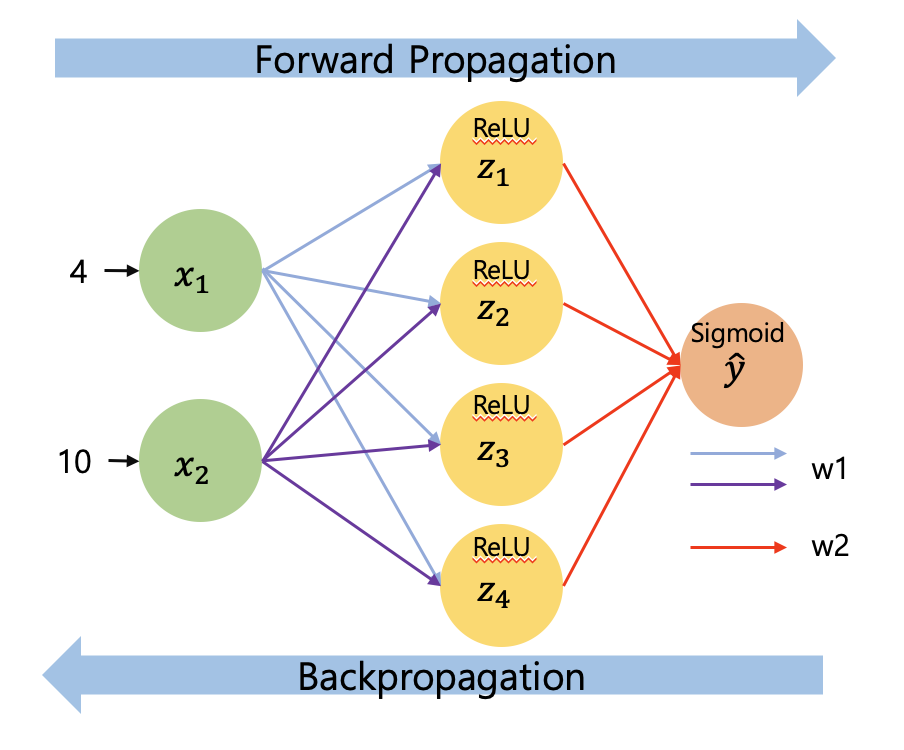

In [7]:
import numpy as np


SEED = 42
rng = np.random.default_rng(SEED)


x = np.array([[4., 10.]], dtype=np.float64)   # (1,2)
y = np.array([[1.]], dtype=np.float64)       # (1,1)

print("x:", x, " y:", y)

x: [[ 4. 10.]]  y: [[1.]]


In [8]:
in_dim, hidden, out_dim = 2, 4, 1
W1 = np.array([[ 0.250, -0.150,  0.050,  0.130],
               [-0.050,  0.200, -0.100,  0.050]], dtype=np.float64)
b1 = np.zeros((1, hidden))
W2 = np.array([[ 0.050],
               [-0.150],
               [ 0.100],
               [ 0.180]], dtype=np.float64)
b2 = np.zeros((1, out_dim))

print("W1:\n", W1, "\nb1:\n", b1)
print("W2:\n", W2, "\nb2:\n", b2)

W1:
 [[ 0.25 -0.15  0.05  0.13]
 [-0.05  0.2  -0.1   0.05]] 
b1:
 [[0. 0. 0. 0.]]
W2:
 [[ 0.05]
 [-0.15]
 [ 0.1 ]
 [ 0.18]] 
b2:
 [[0.]]


In [9]:
# 2 -> 4 -> 1 DNN의 순전파와 BCE 손실 계산

# [A]: 1층 pre-activation
# [B]: 1층 활성값(ReLU)
# [C]: 출력층 pre-activation
# [D]: 예측 확률(Sigmoid 출력)
# [E]: 이진 크로스엔트로피 손실 (y_hat 대신, y_hat_c를 사용하여 계산)

# 순전파
z1 = x @ W1 + b1                 # (1,4)
a1 = np.maximum(0, z1)                 # ReLU
z2 = a1 @ W2 + b2                 # (1,1)
y_hat = 1 / (1 + np.exp(-z2))              # Sigmoid

# Binary Cross-Entropy
eps = 1e-12 # 수치안정용 작은 상수
y_hat_c = np.clip(y_hat, eps, 1-eps) # 클리핑된 예측 확률
loss = -(y * np.log(y_hat_c) + (1 - y) * np.log(1 - y_hat_c))               # shape (1,1)

print("z1:", z1)
print("a1:", a1)
print("z2:", z2)
print("y_hat:", y_hat)
print("loss:", float(loss))

z1: [[ 0.5   1.4  -0.8   1.02]]
a1: [[0.5  1.4  0.   1.02]]
z2: [[-0.0014]]
y_hat: [[0.49965]]
loss: 0.6938474255599252


In [10]:
# [A]: 출력층 잔차 (정답과 예측값의 차이)
# [B]: 출력층 가중치 기울기
# [C]: 출력층 편향 기울기
# [D]: 은닉층 활성 기울기
# [E]: ReLU 입력 기울기
# [F]: 1층 가중치 기울기
# [G]: 1층 편향 기울기

dz2 = y_hat - y                      # (1,1)

# 출력층 기울기
dW2 = a1.T @ dz2                      # (4,1)
db2 = dz2                      # (1,1)

# 은닉층으로 전파
da1 = dz2 @ W2.T                      # (1,4)
dz1 = da1 * (z1 > 0)                      # (1,4)

# 입력→은닉층 기울기
dW1 = x.T @ dz1                      # (2,4)
db1 = dz1                      # (1,4)

print("dz2:", dz2)
print("dW2:\n", dW2, "\ndb2:\n", db2)
print("da1:", da1)
print("dz1:", dz1)
print("dW1:\n", dW1, "\ndb1:\n", db1)

dz2: [[-0.50035]]
dW2:
 [[-0.250175]
 [-0.70049 ]
 [ 0.      ]
 [-0.510357]] 
db2:
 [[-0.50035]]
da1: [[-0.0250175  0.0750525 -0.050035  -0.090063 ]]
dz1: [[-0.0250175  0.0750525 -0.        -0.090063 ]]
dW1:
 [[-0.10007   0.30021   0.       -0.360252]
 [-0.250175  0.750525  0.       -0.90063 ]] 
db1:
 [[-0.0250175  0.0750525 -0.        -0.090063 ]]


In [11]:
# [A]: W1 업데이트 항
# [B]: b1 업데이트 항
# [C]: W2 업데이트 항
# [D]: b2 업데이트 항
# [E]: 업데이트 후 1층 pre-activation
# [F]: 업데이트 후 1층 활성값(ReLU)
# [G]: 업데이트 후 출력층 pre-activation
# [H]: 업데이트 후 예측 확률
# [I]: 업데이트 후 손실

lr = 0.5  # 학습률

# 업데이트 전 값 보관
W1_before, b1_before = W1.copy(), b1.copy()
W2_before, b2_before = W2.copy(), b2.copy()

# SGD 업데이트
W1 -= lr * dW1
b1 -= lr * db1
W2 -= lr * dW2
b2 -= lr * db2

# 변경량(Δ = after - before) 출력
print("ΔW1:\n", W1 - W1_before, "\nΔb1:\n", b1 - b1_before)
print("ΔW2:\n", W2 - W2_before, "\nΔb2:\n", b2 - b2_before)

# 업데이트 후 손실이 어떻게 변했는지 바로 확인(한 번 더 순전파)
z1_new = x @ W1 + b1
a1_new = np.maximum(0, z1_new)
z2_new = a1_new @ W2 + b2
y_hat_new = 1 / (1 + np.exp(-z2_new))
y_hat_new_c = np.clip(y_hat_new, 1e-12, 1-1e-12)
loss_new = -(y * np.log(y_hat_new_c) + (1 - y) * np.log(1 - y_hat_new_c))

print("\nloss(before) =", float(loss), " -> loss(after) =", float(loss_new))
print("y_hat(before) =", y_hat, " -> y_hat(after)  =", y_hat_new)

ΔW1:
 [[ 0.050035  -0.150105   0.         0.180126 ]
 [ 0.1250875 -0.3752625  0.         0.450315 ]] 
Δb1:
 [[ 0.01250875 -0.03752625  0.          0.0450315 ]]
ΔW2:
 [[0.1250875]
 [0.350245 ]
 [0.       ]
 [0.2551785]] 
Δb2:
 [[0.250175]]

loss(before) = 0.6938474255599252  -> loss(after) = 0.035144473921798786
y_hat(before) = [[0.49965]]  -> y_hat(after)  = [[0.96546592]]
